In [114]:
# Answer with the type of stats test you would use (assume normal distribution):



# Is there a relationship between the length of your arm and the length of your foot?

# for normal distributions: stats.pearsonr



# Do guys and gals quit their jobs at the same rate?

# for nonparametic test: `stats.spearmanr`



# Does the length of time of the lecture correlate with a students grade?
# for normal distributions: stats.pearsonr

In [11]:
# Use the telco_churn data.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
import env

query = '''

select * from customers;


'''
# Does tenure correlate with monthly charges?

# x = db.tenure
# y = db.monthly_charges


# Hypothesis Testing Procedure:¶


# Determine the appropriate test
# continuous data
# r, p = stats.pearsonr(x, y)

# what variables you are comparing
# monthly charges and tenure

# are your variables continuous or categorical?
# continuous


# Setup

# set null hypothesis
# monthly charges have no effect on tenure


# set alternate hypothesis
#monthly charges have do have an effect on tenure

# # set p-values
# alpha = .05

# # Visualize
# plt.scatter(x, y)
# plt.xlabel('tenure')
# plt.ylabel('monthly_charges')
# plt.show()

# # Calculate test statistic + p-value
# r, p = stats.pearsonr(x, y)
# # Conclude

# url = f'mysql+pymysql://{env.username}:{env.password}@{env.hostname}/telco_churn'
# db = pd.read_sql(query, url)

# print(r, p)
# low positive correlation
# there is significant correlation because the p value is less than alpha








# Total charges?

# Hypothesis Testing Procedure:
# total charges have no effect on tenure
# total charges have an effect on tenure



# Determine the appropriate test
# continuous data
# r, p = stats.pearsonr(x, y)


# what variables you are comparing?
# total charges and tenure


# are your variables continuous or categorical?
# continuous


# Setup

x = db.tenure.fillna(0)
y = pd.to_numeric(db.total_charges, errors='coerce').fillna(0)





# set null hypothesis
# total charges have no effect on tenure


# set alternate hypothesis
# total charges have an effect on tenure



# set p-values
alpha = .05


# Visualize
# plt.hist(x)

# plt.show()



# Calculate test statistic + p-value
# r, p = stats.pearsonr(x, y)
# print(r, p)

# r, p = stats.spearmanr(x, y)
# print(r, p)

# Conclude
# we fail to reject the null hypothesis


# What happens if you control for phone and internet service?
new_database = db[db.phone_service == 'Yes']
new_database = new_database[new_database.internet_service_type_id == 1]
new_database



# Hypothesis Testing Procedure:¶
# Determine the appropriate test


x = new_database.tenure
y = new_database.monthly_charges


# what variables you are comparing?
# monthly_charges
# tenure



# are your variables continuous or categorical?
# continuous


# Setup



# set null hypothesis
# among customers that have phone and internet service there is no correlation between tenure
# and monthly charges


# set alternate hypothesis
# among customers that have phone and internet service there is a correlation between tenure
# and monthly charges


# set p-values
alpha = .05


# Visualize
plt.hist(y)

plt.show()

plt.hist(x)

plt.show()
# Calculate test statistic + p-value

other_r , other_p = stats.spearmanr(x, y)



print(other_r, other_p)


# Conclude



NameError: name 'db' is not defined

In [260]:
# Use the employees database.

query = '''
select emp_no ,datediff(maximum_date, hire_date) as days from employees
join (select emp_no, max(to_date) as maximum_date from salaries 
group by emp_no)  as left_company using(emp_no)
where maximum_date < curdate();
'''

url = f'mysql+pymysql://{env.username}:{env.password}@{env.hostname}/employees'
employee_days_one = pd.read_sql(query, url)



query = '''
select emp_no, datediff(curdate(),  hire_date) as days from employees
join (select emp_no, max(to_date) as maximum_date from salaries 
group by emp_no) as subtable using( emp_no)
where maximum_date > curdate();
'''

url = f'mysql+pymysql://{env.username}:{env.password}@{env.hostname}/employees'
employee_days_two = pd.read_sql(query, url)


query = '''
select  emp_no, max(salary), max(to_date) from salaries
group by emp_no;
'''

url = f'mysql+pymysql://{env.username}:{env.password}@{env.hostname}/employees'
employee_day_salaries = pd.read_sql(query, url)



(59900, 2)
(240124, 2)
        emp_no  max(salary) max(to_date)
0        10001        88958   9999-01-01
1        10002        72527   9999-01-01
2        10003        43699   9999-01-01
3        10004        74057   9999-01-01
4        10005        94692   9999-01-01
...        ...          ...          ...
300019  499995        52868   9999-01-01
300020  499996        69501   9999-01-01
300021  499997        83441   9999-01-01
300022  499998        55003   9999-01-01
300023  499999        77303   9999-01-01

[300024 rows x 3 columns]
        emp_no   days  max(salary)
0        10001  13438        88958
1        10002  13655        72527
2        10003  13375        43699
3        10004  13280        74057
4        10005  12264        94692
...        ...    ...          ...
300019  499995  11046        52868
300020  499996  11884        69501
300021  499997  13504        83441
300022  499998  10772        55003
300023  499999   9263        77303

[300024 rows x 3 columns]


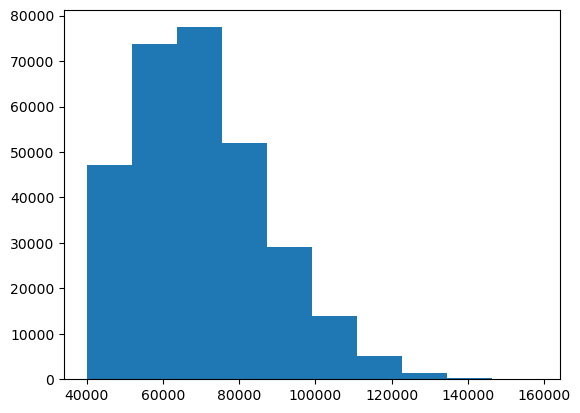

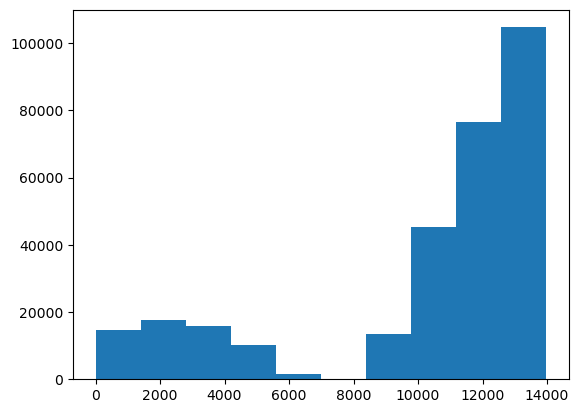

0.3756747592045724 0.0


In [292]:
employee_days_one.sort_values(by='emp_no')

print(employee_days_one.shape)
print(employee_days_two.shape)
print(employee_day_salaries.sort_values(by='emp_no'))


# Is there a relationship between how long an employee has been with the company and their salary?


# print(employee_days_one)
df = pd.concat([employee_days_one, employee_days_two], axis = 0)
df = df.sort_values(by='emp_no')
df = pd.merge(df, employee_day_salaries, how='inner', on = 'emp_no')
df = df.drop(columns='max(to_date)')


print(df)

# Hypothesis Testing Procedure:
# Determine the appropriate test

x = df.days
y = df['max(salary)']


# what variables you are comparing?
# the tenure and the max salary of employees


# are your variables continuous or categorical?
# both are continuous 



# Setup
# set null hypothesis
# there is no correlation between tenure and salary

# set alternate hypothesis
# there is correlation between tenure and salary


# set p-values
alpha = .05


# Visualize
plt.hist(y)

plt.show()

plt.hist(x)

plt.show()
# Calculate test statistic + p-value
r,p = stats.spearmanr(x,y)

print(r,p)


# Conclude
# there is low positive correlation






In [ ]:
# the extra work with the wrong set of data


# telco_churn = pd.read_csv('telco_norm.csv')


# # Does tenure correlate with monthly charges?


# telco_churn['tenure'] = (pd.to_datetime(telco_churn['churn_month']) - pd.to_datetime(telco_churn['signup_date']))

# telco_churn['tenure'] = telco_churn['tenure'].astype(str)

# telco_churn['tenure'] = telco_churn['tenure'].str.split('days').str[0]



    
# print(telco_churn.tenure != 'NaT')
# telco_churn['tenure'] = telco_churn[telco_churn.tenure != 'NaT']
# telco_churn['tenure'] = pd.to_numeric(telco_churn['tenure'], errors='coerce')

# the_second_set_of_data = telco_churn['tenure']




# print(the_first_set_of_data)

# print(the_second_set_of_data)

# alpha = .05
# # r, p = stats.pearsonr(the_first_set_of_data, the_second_set_of_data)
# # r, p


In [298]:

# Is there a relationship between how long an employee has been with the company and the number
# of titles they have had?

query = '''
select emp_no, datediff(maximum_to_date, min_from_date) as days from (
select emp_no, min(from_date) as min_from_date, max(to_date) as maximum_to_date from titles
group by emp_no
having maximum_to_date < curdate() )as quitters
;
'''

url = f'mysql+pymysql://{env.username}:{env.password}@{env.hostname}/employees'
tenure_employees_not_current = pd.read_sql(query, url)



query = '''
select emp_no, datediff(curdate(), min_from_date) as days from(
select emp_no, min(from_date) as min_from_date, max(to_date) as maximum_to_date from titles
group by emp_no
having maximum_to_date > curdate()) as current_emp
;
'''

url = f'mysql+pymysql://{env.username}:{env.password}@{env.hostname}/employees'
tenure_employees_current = pd.read_sql(query, url)




query = '''
select emp_no, count(title) from titles
group by emp_no;
'''

url = f'mysql+pymysql://{env.username}:{env.password}@{env.hostname}/employees'
count_of_titles = pd.read_sql(query, url)









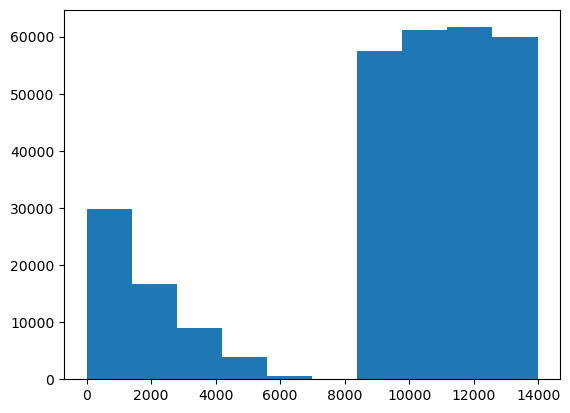

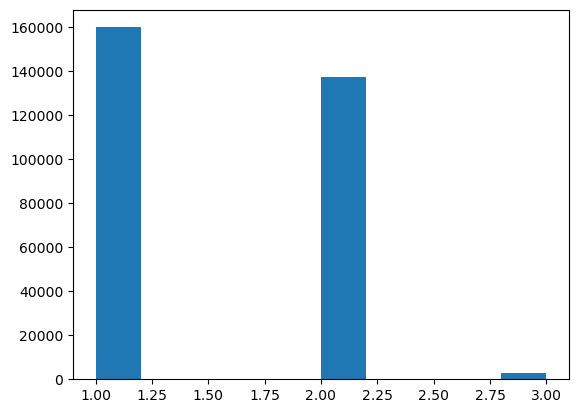

0.5457169312525748 0.0


In [308]:
# print(tenure_employees_not_current)
# print(tenure_employees_current)
# print(count_of_titles)


# Is there a relationship between how long an employee has been with the company and the number
# of titles they have had?


df = pd.concat([tenure_employees_not_current, tenure_employees_current], axis = 0)

df = df.sort_values(by='emp_no')

df = pd.merge(df, count_of_titles, how='inner', on = 'emp_no')

df

# Hypothesis Testing Procedure:¶
# Determine the appropriate test


# what variables you are comparing?


# are your variables continuous or categorical?
# one is catagorical one is continuous

# Setup
# set null hypothesis
# there is no correlation between the count of titles and the tenure


# set alternate hypothesis
# there is a correlation between the count of titles and the tenure

# set p-values
alpha = .05
# Visualize
x = df['count(title)']
y = df.days
plt.hist(y)

plt.show()

plt.hist(x)

plt.show()

# Calculate test statistic + p-value
r, p = stats.spearmanr(x,y)
print(r,p)

# Conclude
# there is moderate positive correlation 
# we reject the null hypothesis

In [4]:
# Use the sleepstudy data.
from pydataset import data
df = data('sleepstudy')
df
# Is there a relationship between days and reaction time?

# Determine the appropriate test
# what variables you are comparing?
# days to reaction time


# are your variables continuous or categorical?
# one is catagorical one is continuous


# Setup
# set null hypothesis
# there is no correlation between days and reaction time


# set alternate hypothesis
# there is a correlation between days and reaction time



# set p-values

alpha = .05
# Visualize

x = df.Days
y = df.Reaction

plt.hist(x)
plt.show()
plt.hist(y)
plt.show()
# Calculate test statistic + p-value
r, p = stats.pearsonr(x,y)
print(r,p)

r, p = stats.spearmanr(x,y)
print(r,p)
# Conclude
# there is moderate positive correlation
# we reject the null hypothesis

NameError: name 'plt' is not defined

In [1]:
# Answer with the type of stats test you would use (assume normal distribution):

# Do students get better test grades if they have a rubber duck on their desk?
# student grades are not affected by a rubber duck being on their desk
# students with a rubber duck have greater grades than those who don't have one on their desk

# I would run the scipy.stats.ttest_ind because there are two samples you can pull out of the data





# Does smoking affect when or not someone has lung cancer?
# smoking does not effect when someone has lung cancer
# smokeing does effect when someone has lung cancer


# scipy.stats.ttest_ind 
# because you have people with lung cancer and people without lung cancer two groups
# run the correlation test
# check to see if the data is normally distributed or not and run the 
# stats.spearmanr
# or 
# stats.pearsonr


# Is gender independent of a person’s blood type?
# i would run the dependence stat test
# pd.crosstab
# chi2, p, degf, expected = stats.chi2_contingency(observed) 



# A farming company wants to know if a new fertilizer has improved crop yield or not
# i would run the scipy.stats.ttest_ind because there are two sets of data
# and a varience test




# Does the length of time of the lecture correlate with a students grade?
# i would run a correlation test
# stats.pearsonr
# or stats.spearmanr depeding on if the data is normally distributed or not


# Do people with dogs live in apartments more than people with cats?
# i would use the scipy.stats.f_oneway because there is more than one group of data


In [3]:
# Use the following contingency table to help answer the question of 
# whether using a macbook and being a codeup student are independent of each other.


In [28]:
# Choose another 2 categorical variables from the mpg dataset 
# and perform a chi2
# contingency table test with them. 
# Be sure to state your null and alternative hypotheses.

# class is not dependent on year
# class is dependent on year

df = data('mpg')

observed = pd.crosstab(df.year, df['class'])
observed



class,2seater,compact,midsize,minivan,pickup,subcompact,suv
year,,,,,,,
1999,2,25,20,6,16,19,29
2008,3,22,21,5,17,16,33


In [15]:
chi2, p, degf, expected = stats.chi2_contingency(observed)
chi2, p

(1.052299100088577, 0.9835517873618908)

In [17]:
observed


class,2seater,compact,midsize,minivan,pickup,subcompact,suv
year,,,,,,,
1999,2,25,20,6,16,19,29
2008,3,22,21,5,17,16,33


In [19]:
expected

array([[ 2.5, 23.5, 20.5,  5.5, 16.5, 17.5, 31. ],
       [ 2.5, 23.5, 20.5,  5.5, 16.5, 17.5, 31. ]])

In [23]:
print(pd.DataFrame(expected.astype('float'), index=observed.index, 
                   columns=observed.columns))

class  2seater  compact  midsize  minivan  pickup  subcompact   suv
year                                                               
1999       2.5     23.5     20.5      5.5    16.5        17.5  31.0
2008       2.5     23.5     20.5      5.5    16.5        17.5  31.0


In [29]:
observed2 = pd.crosstab(df.year == 1999, df['class'] == '2seater')
observed2

class,False,True
year,,
False,114,3
True,115,2


In [31]:
chi2, p, degf, expected = stats.chi2_contingency(observed2)
chi2, p

(0.0, 1.0)

In [33]:
# Use the data from the employees database to answer these questions:
query = '''
select emp_no, gender, dept_no, largest, dept_name from employees
join dept_emp using(emp_no)
join (select emp_no, max(to_date) as largest from dept_emp
group by emp_no) as maximum using(emp_no)
join departments using(dept_no)
;
'''

url = f'mysql+pymysql://{env.username}:{env.password}@{env.hostname}/employees'
the_data = pd.read_sql(query, url)



,emp_no,gender,dept_no,largest,dept_name
0,10001,M,d005,9999-01-01,Development
1,10002,F,d007,9999-01-01,Sales
2,10003,M,d004,9999-01-01,Production
3,10004,M,d004,9999-01-01,Production
4,10005,M,d003,9999-01-01,Human Resources
...,...,...,...,...,...
331598,499995,F,d004,9999-01-01,Production
331599,499996,M,d004,9999-01-01,Production
331600,499997,M,d005,9999-01-01,Development
331601,499998,M,d002,9999-01-01,Finance


In [38]:
the_data

# Is an employee's gender independent of whether an employee 
# works in sales or marketing? (only look at current employees)
observed3 = pd.crosstab(the_data.gender, the_data.dept_name == 'Sales')
print(observed3)

chi2, p, degf, expected = stats.chi2_contingency(observed3)
print(chi2, p)




dept_name   False   True
gender                  
F          111899  20854
M          167459  31391
0.35348159444755883 0.552148869820815


dept_name   False   True
gender                  
F          111899  20854
M          167459  31391
0.35348159444755883 0.552148869820815


In [42]:
query = '''
select emp_no, gender,  
case
		when employees.emp_no in (select emp_no from dept_manager) then '1'
        when employees.emp_no not in (select emp_no from dept_manager) then '0'
	end 'was_a_manager'

from employees;
'''

url = f'mysql+pymysql://{env.username}:{env.password}@{env.hostname}/employees'
the_data = pd.read_sql(query, url)




In [51]:
# Is an employee's gender independent of whether or not 
# they are or have been a manager?

the_data[the_data.was_a_manager == '1']


observed4 = pd.crosstab(the_data.gender, the_data.was_a_manager)
print(type(observed4))

chi2, p, degf, expected = stats.chi2_contingency(observed4)
print(chi2, p)



<class 'pandas.core.frame.DataFrame'>
1.4566857643547197 0.22745818732810363


In [53]:
print(observed4)
print(expected.astype(int))


was_a_manager       0   1
gender                   
F              120038  13
M              179962  11
[[120041      9]
 [179958     14]]


In [87]:
the_list_of_yes = []

    
    

df = pd.DataFrame([[49, 20], [1,30]], columns=['is_student', 'not_student'])
df = df.rename(index={0: "uses a macbook", 1: "doesnt use a macbook", 2: "z"})
print(df)

chi2, p, degf, expected = stats.chi2_contingency(df)
print(chi2, p)
# we fail to reject the null hypothesis

                      is_student  not_student
uses a macbook                49           20
doesnt use a macbook           1           30
36.65264142122487 1.4116760526193828e-09


pandas.core.frame.DataFrame